In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df = pd.read_csv('../data/processed/books_dedup.csv')
final_df.head()

,title,author,rating,rating_count,description,isbn,image,book_url,pages,published_year,language,genres,source
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9943135.0,NaN,9780439023481.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/2767052-th...,374.0,NaN,NaN,"Young Adult, Dystopia, Fiction, Fantasy, Scien...",web_scraping
1,Pride and Prejudice,Jane Austen,4.30,4821169.0,NaN,9781441341709.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/1885.Pride...,279.0,NaN,NaN,"Classics, Romance, Fiction, Historical Fiction...",web_scraping
2,To Kill a Mockingbird,Harper Lee,4.26,6905680.0,NaN,9780060935467.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/2657.To_Ki...,323.0,NaN,NaN,"Classics, Fiction, Historical Fiction, School,...",web_scraping
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3805184.0,NaN,9780439358064.0,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/58613451-h...,896.0,NaN,NaN,"Fantasy, Fiction, Young Adult, Harry Potter, M...",web_scraping
4,The Book Thief,Markus Zusak,4.39,2887607.0,NaN,NaN,https://m.media-amazon.com/images/S/compressed...,https://www.goodreads.com/book/show/19063.The_...,592.0,NaN,NaN,"Historical Fiction, Fiction, Young Adult, Clas...",web_scraping


In [3]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1369 non-null   str    
 1   author          1369 non-null   str    
 2   rating          1345 non-null   float64
 3   rating_count    1345 non-null   float64
 4   description     878 non-null    str    
 5   isbn            1248 non-null   str    
 6   image           1367 non-null   str    
 7   book_url        1370 non-null   str    
 8   pages           1369 non-null   float64
 9   published_year  878 non-null    float64
 10  language        878 non-null    str    
 11  genres          1369 non-null   str    
 12  source          1370 non-null   str    
dtypes: float64(4), str(9)
memory usage: 139.3 KB


In [4]:
# how many different genres in one book?

final_df['n_genres'] = final_df['genres'].str.split(",").str.len() # additional column for the numerical transformation 
final_df['n_genres']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1365    3.0
1366    3.0
1367    3.0
1368    4.0
1369    3.0
Name: n_genres, Length: 1370, dtype: float64

In [5]:
final_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1369 non-null   str    
 1   author          1369 non-null   str    
 2   rating          1345 non-null   float64
 3   rating_count    1345 non-null   float64
 4   description     878 non-null    str    
 5   isbn            1248 non-null   str    
 6   image           1367 non-null   str    
 7   book_url        1370 non-null   str    
 8   pages           1369 non-null   float64
 9   published_year  878 non-null    float64
 10  language        878 non-null    str    
 11  genres          1369 non-null   str    
 12  source          1370 non-null   str    
 13  n_genres        1369 non-null   float64
dtypes: float64(5), str(9)
memory usage: 150.0 KB


In [6]:
final_df[['genres']].head()

,genres
0,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
1,"Classics, Romance, Fiction, Historical Fiction..."
2,"Classics, Fiction, Historical Fiction, School,..."
3,"Fantasy, Fiction, Young Adult, Harry Potter, M..."
4,"Historical Fiction, Fiction, Young Adult, Clas..."


In [7]:
final_df['genres'] = final_df['genres'].str.split(',')

In [8]:
final_df = final_df.explode('genres')


In [9]:
final_df['genres'] = final_df['genres'].str.strip()
final_df['genres'] 

0           Young Adult
0              Dystopia
0               Fiction
0               Fantasy
0       Science Fiction
             ...       
1368      Constitutions
1368      United States
1369          Economics
1369            Capital
1369          Communism
Name: genres, Length: 5354, dtype: str

In [10]:
final_df['genres'].nunique()

1514

In [11]:
# group by genre in order to calculate the avg rating per genre

genre_df = final_df.groupby("genres").agg(
    avg_rating=("rating", "mean"), # how important a genre is 
    total_ratings=("rating_count", "sum")  # how popular
).reset_index()

genre_df


,genres,avg_rating,total_ratings
0,,3.770531,64.0
1,1225?-1274,3.000000,2.0
2,1469-1527. Prince,3.817308,104.0
3,1564-1616,4.000000,5.0
4,1725-1798,3.291667,24.0
...,...,...,...
1509,united states,4.666667,12.0
1510,victor,3.800000,10.0
1511,vocabularies,4.000000,80.0
1512,william,4.000000,5.0


In [22]:
top10_genres = genre_df.sort_values('avg_rating', ascending = False).head(10)

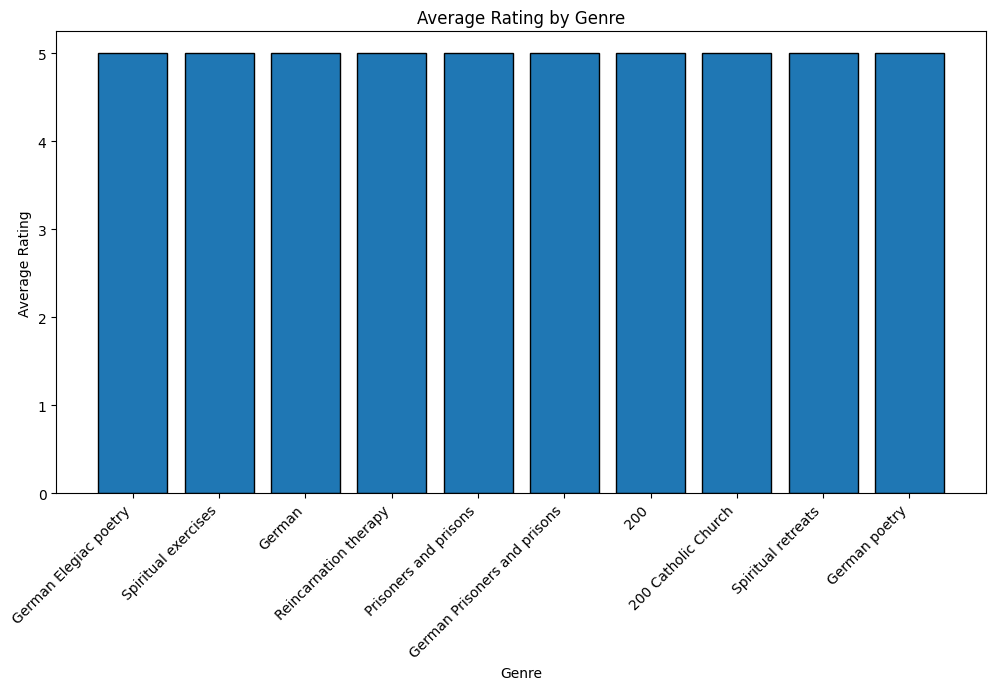

In [23]:
# which genres are rated higher on avg?

#genre_df = genre_df.sort_values('avg_rating', ascending = False)

plt.figure(figsize = (12,6))

plt.bar(top10_genres['genres'],top10_genres['avg_rating'],edgecolor='black')
plt.title ("Average Rating by Genre")
plt.xlabel ("Genre")
plt.ylabel ("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

In [24]:
final_df["rating"].value_counts(dropna=False).head(10)


rating
4.000000    242
5.000000     93
4.500000     87
4.250000     84
3.500000     84
4.200000     82
NaN          79
4.333334     70
4.150000     61
3.920000     60
Name: count, dtype: int64

# logic error spot: sample size problem --> maybe one book belongs to only one single genre which has a high rating score

In [25]:
genre_df = final_df.groupby("genres").agg(
    avg_rating=("rating", "mean"),
    n_books=("rating", "count"),
    total_ratings=("rating_count", "sum")
).reset_index()


In [26]:
#filter out unreliable genres
genre_df = genre_df[genre_df["total_ratings"] >= 50000]


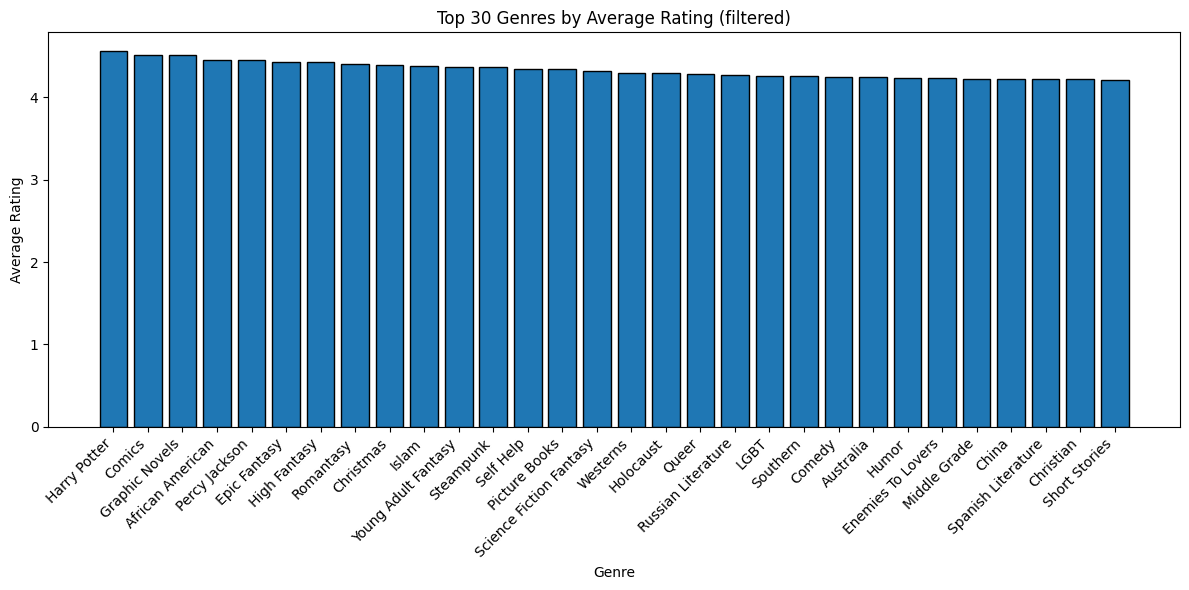

In [27]:
top30 = genre_df.sort_values("avg_rating", ascending=False).head(30)

plt.figure(figsize=(12,6))
plt.bar(top30["genres"], top30["avg_rating"], edgecolor="black")
plt.title("Top 30 Genres by Average Rating (filtered)")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [28]:
popularity_df = final_df.groupby('genres').agg(
    total_ratings = ('rating_count','sum'),
    n_books = ('rating_count','count')
).reset_index()

In [30]:
# filter out tiny books that only got small about of reviews

popularity_df = popularity_df[popularity_df['n_books'] >=10]

In [31]:
top30_popularity = popularity_df.sort_values('total_ratings',ascending = False).head(30)

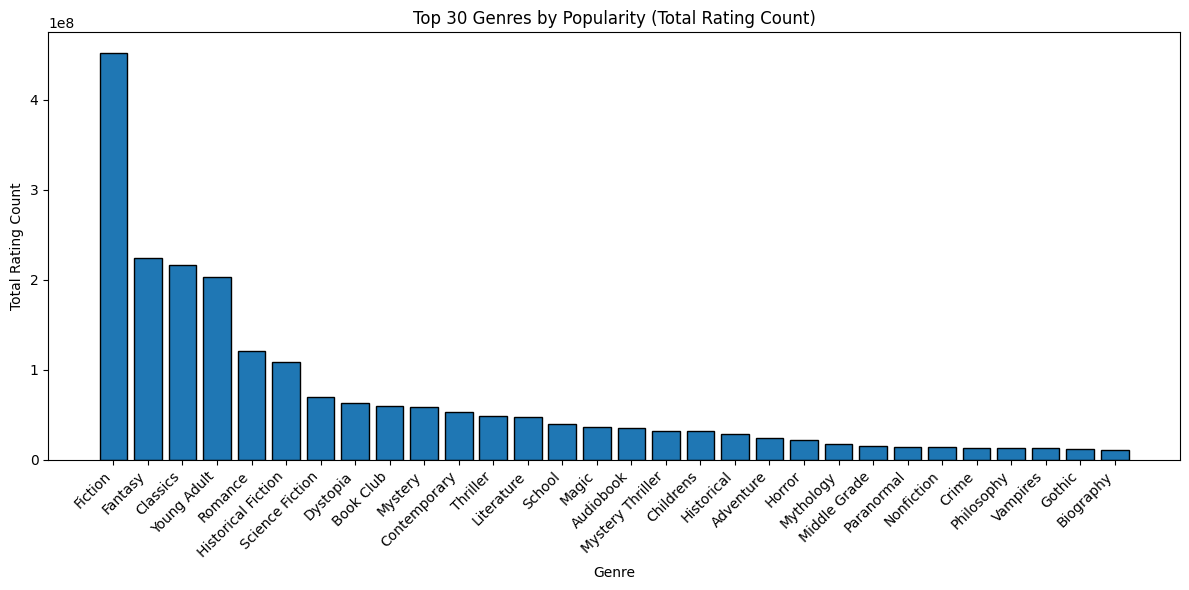

In [34]:
plt.figure(figsize=(12,6))

plt.bar(top30_popularity['genres'],top30_popularity["total_ratings"], edgecolor="black")
plt.title("Top 30 Genres by Popularity (Total Rating Count)")
plt.xlabel("Genre")
plt.ylabel("Total Rating Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
